# Notebook Paola Díaz Serrano
  1. Importar librerías

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

2. Cargar dataset y hacer limpieza de datos(ordenar nombres de columnas)

In [3]:
# Cargar el archivo CSV
df = pd.read_csv('/content/Domestic violence.csv')

# Cambiar nombre de columnas para facilitar acceso
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

3. Exploración de los datos

In [4]:
#Información básica del dataset

df.info()



# Resumen de estadísticas para las columnas numéricas

df.describe()

# Estadísticas descriptivas para todas las columnas
desc_stats = df.describe(include='all').transpose()
print(desc_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sl._no          347 non-null    int64 
 1   age             347 non-null    int64 
 2   education       347 non-null    object
 3   employment      347 non-null    object
 4   income          347 non-null    int64 
 5   marital_status  347 non-null    object
 6   violence        347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB
                count unique         top freq         mean          std   min  \
sl._no          347.0    NaN         NaN  NaN        174.0   100.314505   1.0   
age             347.0    NaN         NaN  NaN    31.380403     9.601569  15.0   
education         347      4     primary  132          NaN          NaN   NaN   
employment        347      4  unemployed  274          NaN          NaN   NaN   
income          347.0    NaN         NaN  Na

4. Promedio de todas las columnas

In [5]:
# Calcular el promedio de todas las columnas numéricas
average_scores = df.mean(numeric_only=True)
print(average_scores)


# Agrupar por todas las columnas categóricas y calcular el promedio de las numéricas
average_by_all_categories = df.groupby(['marital_status', 'violence', 'education', 'employment']).mean(numeric_only=True)
print(average_by_all_categories)

sl._no     174.000000
age         31.380403
income    2110.685879
dtype: float64
                                                     sl._no        age  \
marital_status violence education employment                             
married        no       none      semi employed  307.625000  35.250000   
                                  unemployed     116.939394  36.545455   
                        primary   employed       312.500000  38.000000   
                                  semi employed  289.083333  30.083333   
                                  unemployed     172.642857  35.085714   
                        secondary employed       331.666667  24.666667   
                                  semi employed  305.625000  28.500000   
                                  unemployed     152.203704  26.259259   
                        tertiary  employed       334.272727  34.727273   
                                  employed       340.000000  42.500000   
                               

5. Distribución de la edad

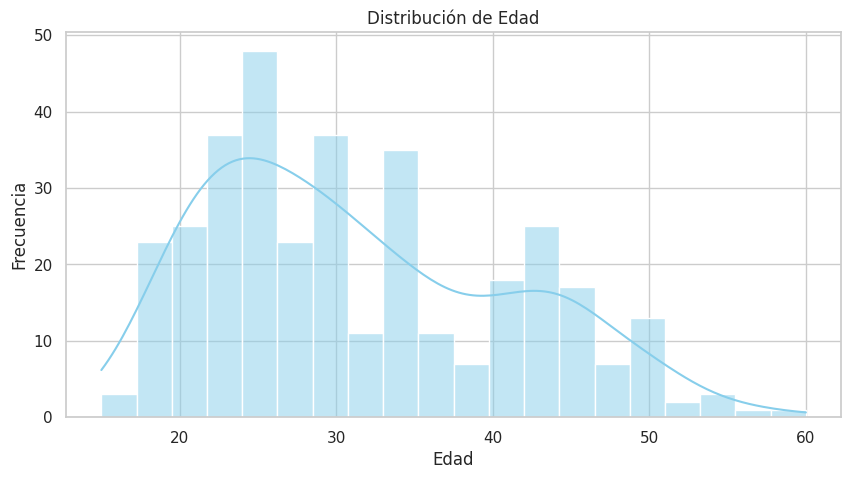

In [6]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Gráfico de distribución de la edad
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


6. Violencia según estado civil

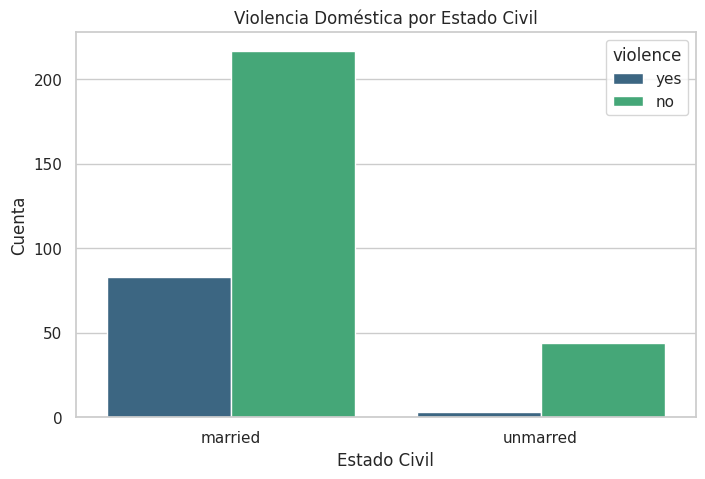

In [7]:
# Gráfico de barras para violencia doméstica por estado civil
plt.figure(figsize=(8, 5))
sns.countplot(x='marital_status', hue='violence', data=df, palette='viridis')
plt.title('Violencia Doméstica por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cuenta')
plt.show()


7. Distribución del empleo

<ipython-input-8-2b6d98101bf5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employment', data=df, palette='muted')


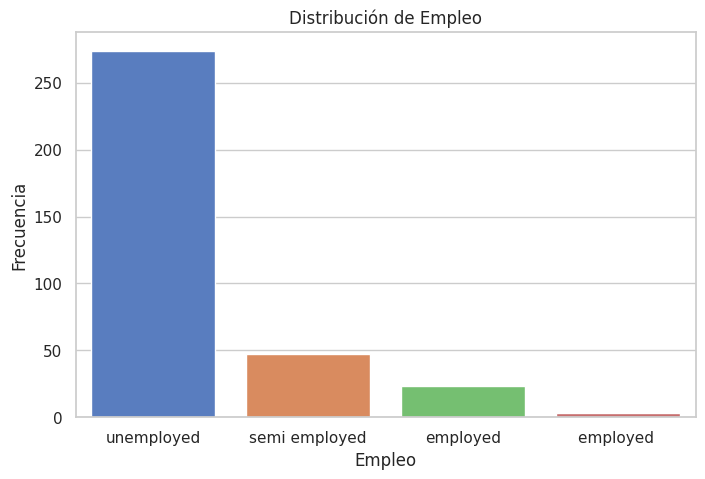

In [8]:
# Gráfico de barras para la distribución del empleo
plt.figure(figsize=(8, 5))
sns.countplot(x='employment', data=df, palette='muted')
plt.title('Distribución de Empleo')
plt.xlabel('Empleo')
plt.ylabel('Frecuencia')
plt.show()


8. Violencia por nivel educativo

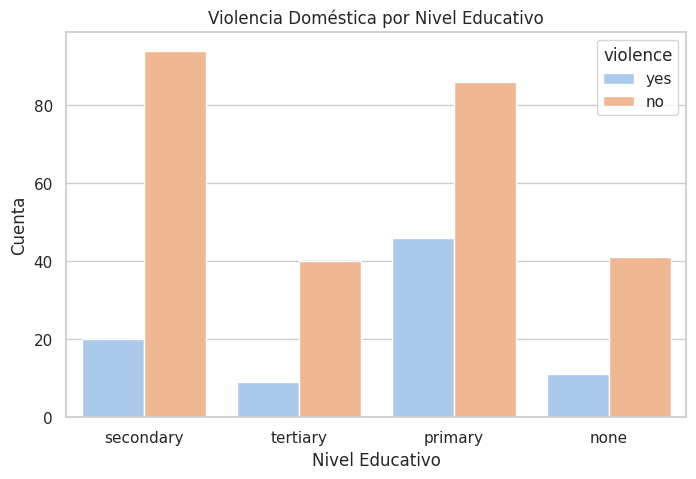

In [9]:
# Gráfico de barras para violencia por nivel educativo
plt.figure(figsize=(8, 5))
sns.countplot(x='education', hue='violence', data=df, palette='pastel')
plt.title('Violencia Doméstica por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cuenta')
plt.show()


9. Mapa de correlación

          sl._no       age    income
sl._no  1.000000 -0.033848  0.554103
age    -0.033848  1.000000  0.055338
income  0.554103  0.055338  1.000000


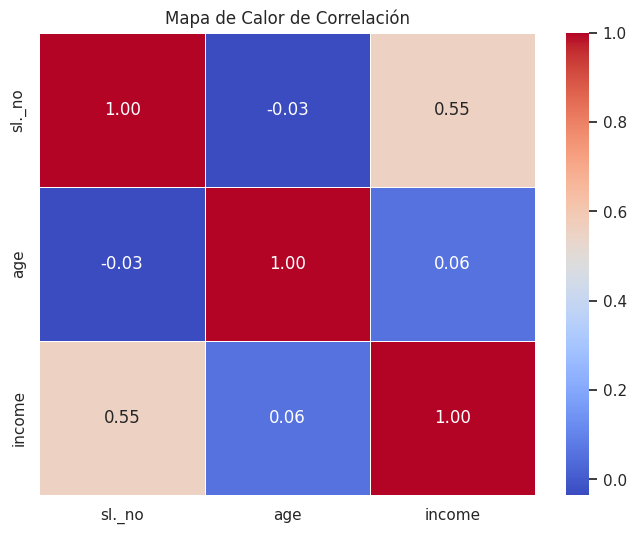

In [10]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# MAPA DE CALOR

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


## Conclusión

Este datast muestra la información sobre la violencia doméstica hacia las mujeres, tiene columnas como:


*   SL. No: Serial number of the record.

*   Age: Age of the respondent.
* Education: Educational attainment of the respondent( tertiary for higher secondary).
* Employment: Employment status of the respondent.
* Income: Income level of the respondent (0 indicating no income).
* Marital status: Marital status of the respondent (married or unmarried).
* Violence: Indicates whether the respondent has experienced domestic violence (yes or no).

Con el análisis de datos que hicimos podemos darnos cuenta que:
* La mayoría de los participantes tienen entre 20 y 40 años, con un pico en los 30 años.
Las personas más jóvenes (< 25 años) y mayores (> 50 años) son menos frecuentes en el estudio.
* El nivel educativo más común es primaria, seguido por secundaria y terciaria.
Existe una relación entre niveles educativos más bajos y una mayor incidencia de violencia reportada.
* La mayoría de los participantes están desempleados.
* Las personas casadas tienen más reportes de violencia que las solteras.

De acuerdo a la correlación:
Existe una correlación negativa moderada entre el nivel de ingresos y la presencia de violencia.

Este análisis de datos contiene temas de sensibles pero que gracias al análisis de datos podemos comprender de mejor manera y pensando a futuro y en un bien mayor, podemos usar estso análisis para psicólogas, grupos de ayuda y que basados en esta información pueda ser de ayuda.